# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

lena = cv2.imread('lenaRGB.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
lenaSzum = cv2.imread('lenaRGBSzum.png')
lenaSzum = cv2.cvtColor(lenaSzum, cv2.COLOR_BGR2RGB)

In [2]:
def color_median(img, size):
    offset = size // 2
    def get_median(hx, wx):
        distance_matrix = np.zeros((size, size))
        window = img[hx - offset : hx + offset + 1, wx - offset : wx + offset + 1]

        for i in range(size):
            for j in range(size):
                distance_matrix[i, j] = np.sqrt(np.square(window - window[i, j])).sum()

        arg_x, arg_y = np.unravel_index(np.argmin(distance_matrix), (size, size))
        return window[arg_x, arg_y]

    result = np.zeros(img.shape)
    for hx in range(offset, img.shape[0] - offset):
        for wx in range(offset, img.shape[1] - offset):
            result[hx, wx] = get_median(hx, wx)

    return result

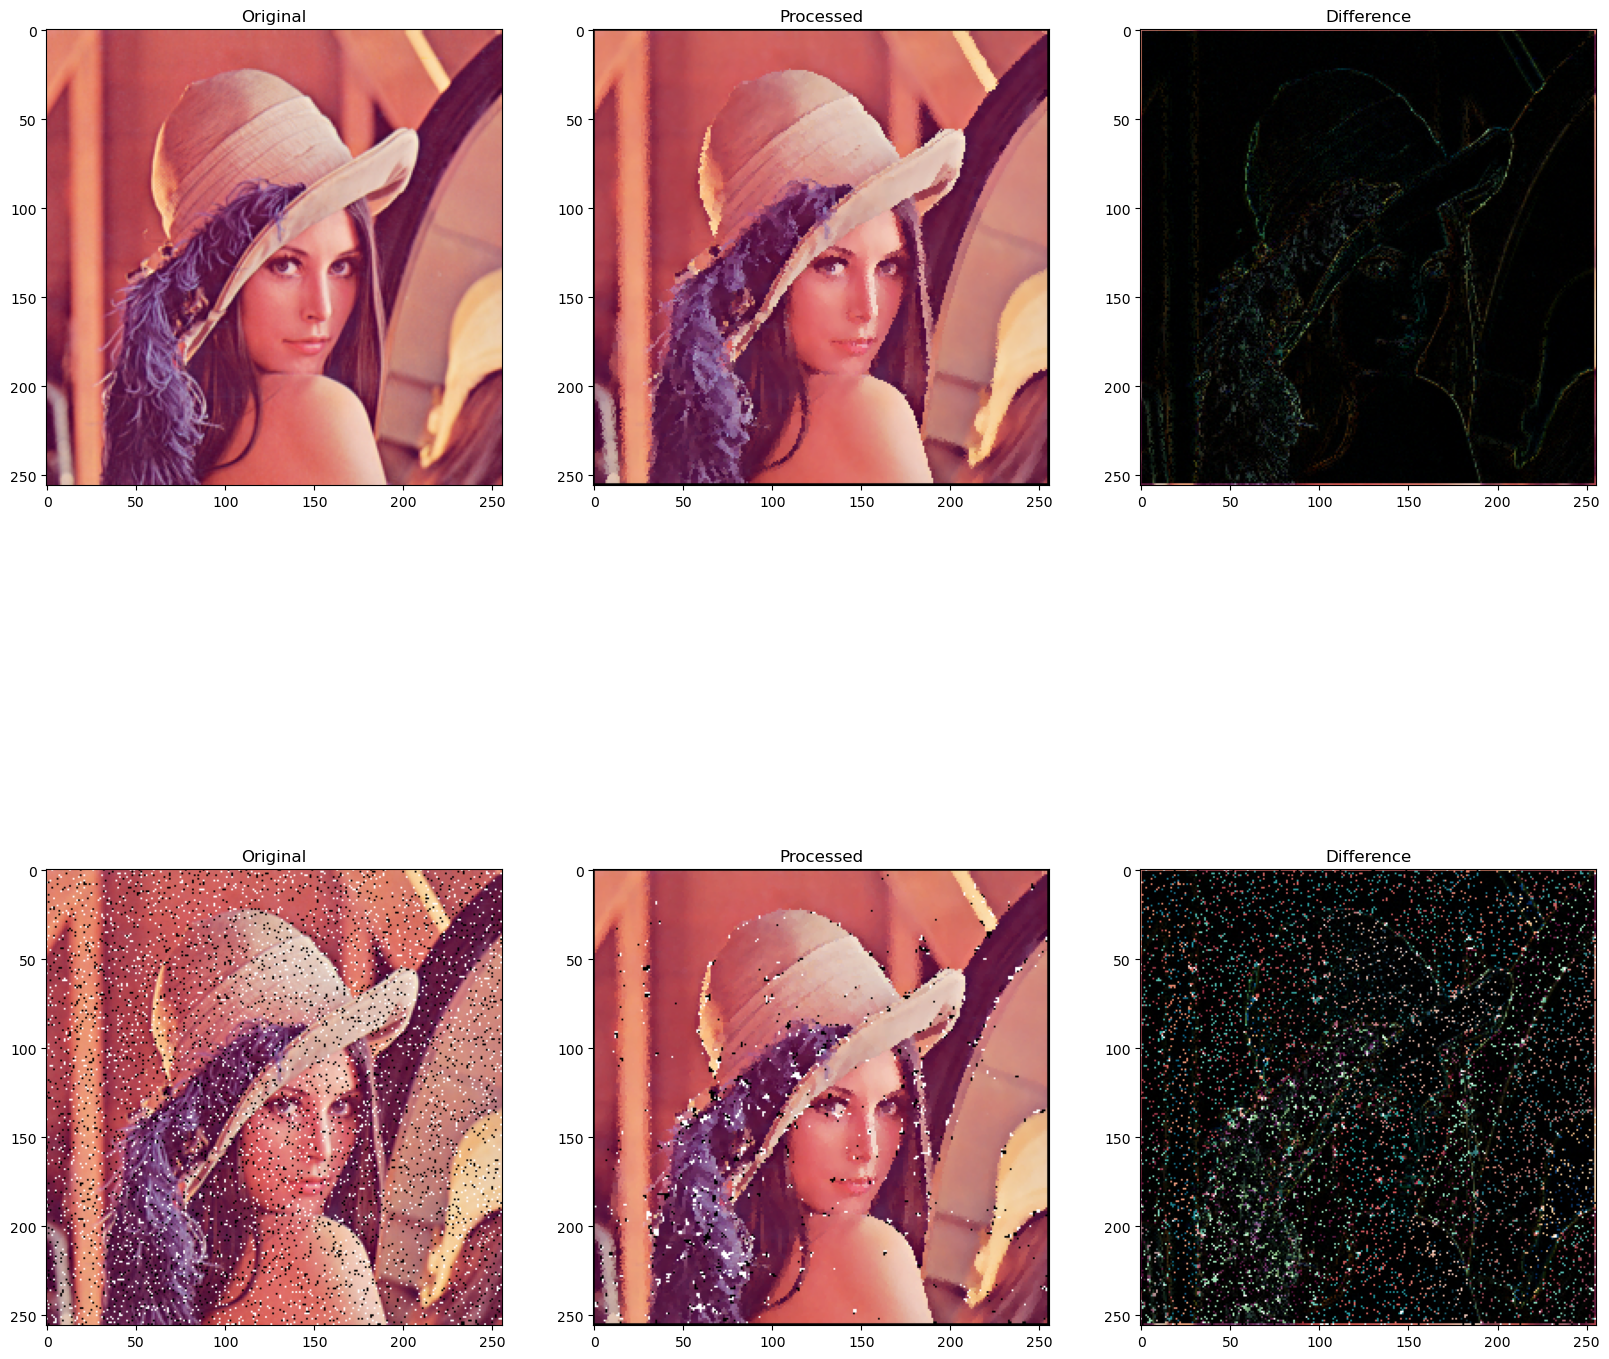

In [3]:
lena_f = color_median(lena, 3).astype('int32')
lena_diff = np.abs(lena_f.astype('int32') - lena.astype('int32'))
lenaSzum_f = color_median(lenaSzum, 3).astype('int32')
lenaSzum_diff = np.abs(lenaSzum_f.astype('int32') - lenaSzum.astype('int32'))


fig, axs = plt.subplots(2, 3, figsize=(20, 20))
axs[0, 0].imshow(lena, vmin=0, vmax=255)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(lena_f, vmin=0, vmax=255)
axs[0, 1].set_title('Processed')
axs[0, 2].imshow(lena_diff, vmin=0, vmax=255)
axs[0, 2].set_title('Difference')
axs[1, 0].imshow(lenaSzum, vmin=0, vmax=255)
axs[1, 0].set_title('Original')
axs[1, 1].imshow(lenaSzum_f, vmin=0, vmax=255)
axs[1, 1].set_title('Processed')
axs[1, 2].imshow(lenaSzum_diff, vmin=0, vmax=255)
axs[1, 2].set_title('Difference')
plt.show()